In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

/home/user-prog/.local/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
f1 = 'радость_10-2.wav'
samplerate_fun, data_fun = wavfile.read(f1)

f2 = 'грусть26-3.wav'
samplerate_sad, data_sad = wavfile.read(f2)

print('Sampling Rate Fun:',samplerate_fun)
print('Audio Shape Fun:',np.shape(data_fun))

print('Sampling Rate Sad:',samplerate_sad)
print('Audio Shape Sad:',np.shape(data_sad))

Sampling Rate Fun: 48000
Audio Shape Fun: (177600, 2)
Sampling Rate Sad: 44100
Audio Shape Sad: (262836,)


In [3]:
duration_fun = len(data_fun)/samplerate_fun
time_fun = np.arange(0, duration_fun, 1 / samplerate_fun) 

duration_sad = len(data_sad)/samplerate_sad
time_sad = np.arange(0, duration_sad , 1 / samplerate_sad) 

print(f"Fun: длительность {duration_fun} \n временная шкала {time_fun}")
print(f"Sad: длительность {duration_sad} \n временная шкала {time_sad}")

Fun: длительность 3.7 
 временная шкала [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 3.69993750e+00
 3.69995833e+00 3.69997917e+00]
Sad: длительность 5.96 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 5.95993197e+00
 5.95995465e+00 5.95997732e+00]


In [4]:
type(data_fun)
type(data_sad)

numpy.ndarray

Графики амплитудынх временных сигналов двух аудио

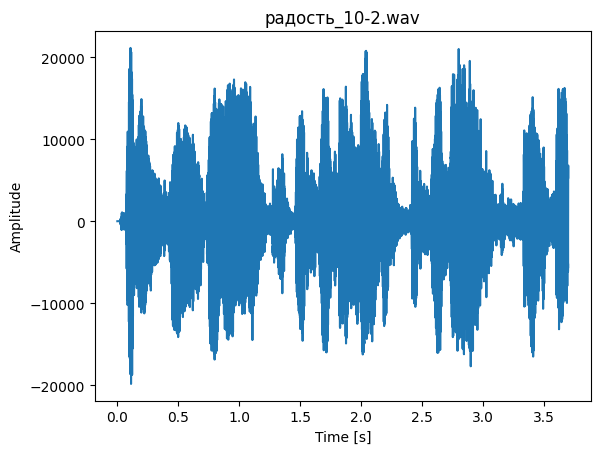

In [7]:
plt.plot(time_fun, data_fun[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('радость_10-2.wav')
plt.show()

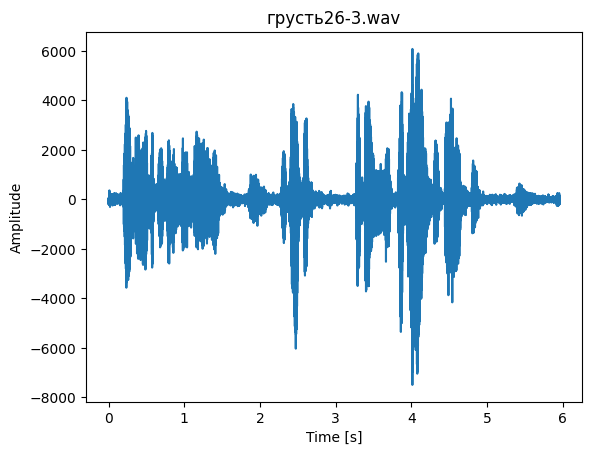

In [11]:
plt.plot(time_sad, data_sad)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('грусть26-3.wav')
plt.show()

In [12]:
sd.play(data_fun[:, 0], samplerate_fun)
sd.wait()

In [14]:
sd.play(data_sad, samplerate_sad)
sd.wait()

Моноформат (одноканальный звук)

Sampling Rate: 48000
Audio Shape: (177600,)


/tmp/ipykernel_7589/3787132440.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


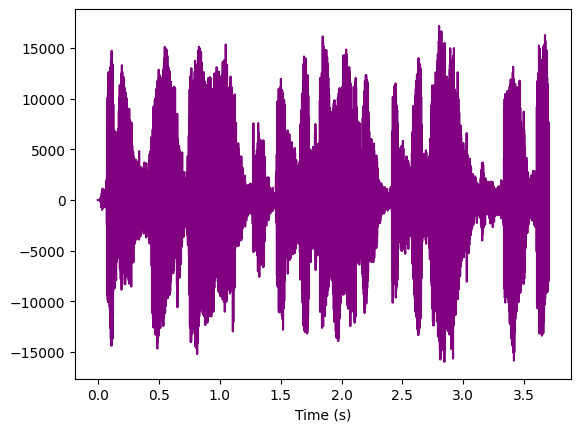

In [28]:
asegment = AudioSegment.from_wav(f1)
asegment = asegment.set_channels(1)
asegment.export("радость_10-2.wav",format="wav")

s,a = wavfile.read("радость_10-2.wav")
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

duration = len(data_fun)/samplerate_fun
time = np.arange(0, duration , 1 / samplerate_fun) 

na = data_fun.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

Sampling Rate: 48000
Audio Shape: (177600,)


/tmp/ipykernel_7589/2670535709.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,data_sad,'k-',color='purple')


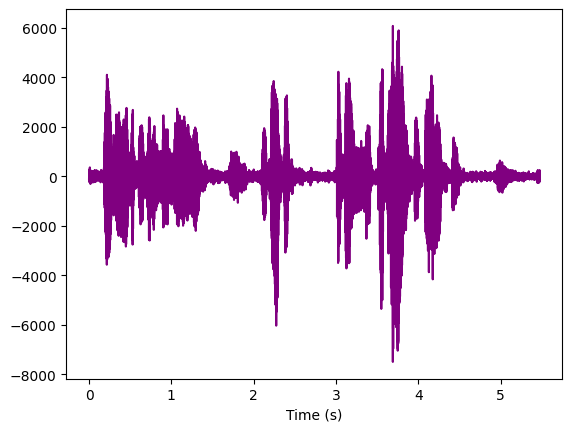

In [27]:
asegment = AudioSegment.from_wav(f2)
asegment = asegment.set_channels(1)
asegment.export("грусть26-3.wav",format="wav")

s,a = wavfile.read("грусть26-3.wav")
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

duration = len(data_sad)/samplerate_sad
time = np.arange(0, duration , 1 / samplerate_sad) 

na = data_sad.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,data_sad,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

Спектр

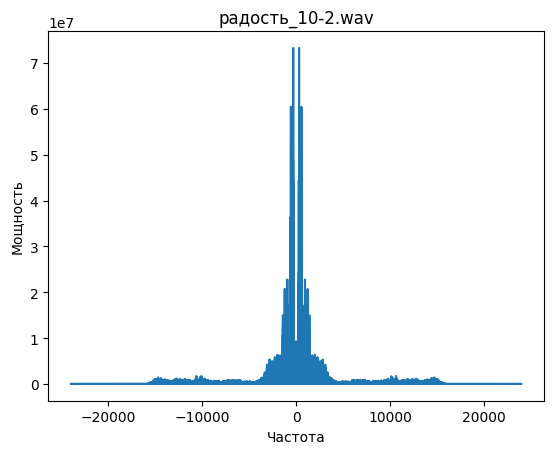

In [29]:
from scipy.fft import fft, fftfreq
N = int(samplerate_fun * duration_fun)
yf = fft(data_fun[:, 0])
xf = fftfreq(N, 1 / samplerate_fun)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('радость_10-2.wav')
plt.show()

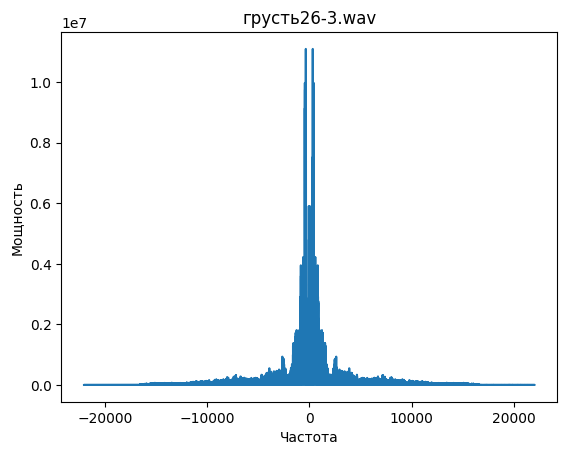

In [30]:
N = int(samplerate_sad * duration_sad)
yf = fft(data_sad)
xf = fftfreq(N, 1 / samplerate_sad)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('грусть26-3.wav')
plt.show()

Мел-кепстральные коэффициенты (MFCC)

In [2]:
import librosa

samples, sample_rate = librosa.load('радость_10-2.wav')

y = samples
sr = sample_rate
mfccs_fun = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)

In [46]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=20000)

/home/user-prog/.local/lib/python3.11/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


[Text(0.5, 1.0, 'MFCC fun')]

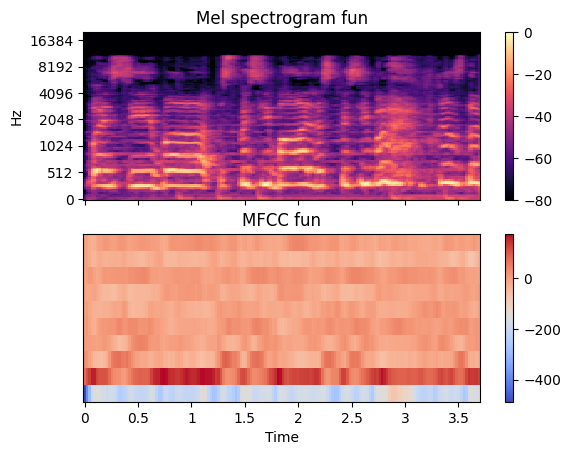

In [47]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram fun')
ax[0].label_outer()
img = librosa.display.specshow(mfccs_fun, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC fun')


In [48]:
mfccs_fun

array([[-486.4076   , -384.25482  , -294.80057  , ..., -167.96512  ,
        -178.65819  , -144.96872  ],
       [  67.78074  ,  110.32304  ,  131.53488  , ...,  132.54707  ,
         139.34464  ,  125.065186 ],
       [  28.103298 ,   16.624361 ,   -4.235086 , ...,  -24.516388 ,
         -33.79721  ,  -18.122799 ],
       ...,
       [  -5.2022734,    1.4660295,    9.776107 , ...,   -3.418936 ,
          -7.5211067,   -8.221832 ],
       [  -2.9831085,   -8.529778 ,  -21.210438 , ...,  -65.672134 ,
         -46.496025 ,  -29.960642 ],
       [  -1.8207142,   -4.8145638,  -23.679865 , ...,   10.866928 ,
           0.8314019,   -9.4995365]], dtype=float32)

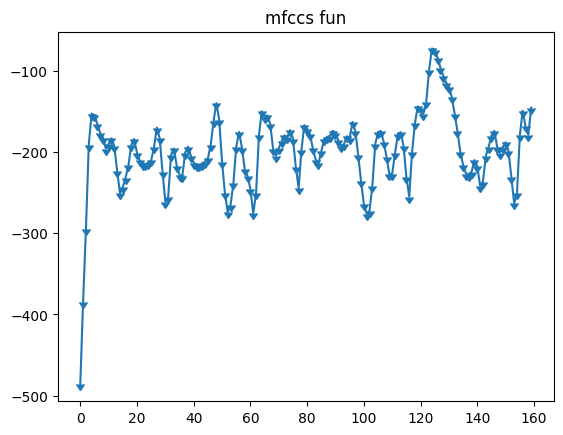

In [49]:
s = mfccs_fun[0:1,:][0,:]
t = [*range(len(s))]
plt.plot(t,  s.reshape(160,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs fun')
plt.show()


In [57]:
samples1, sample_rate1 = librosa.load('грусть26-3.wav')

y1 = samples1
sr1 = sample_rate1
mfccs_sad = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

In [58]:
S = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128, fmax=20000)

/home/user-prog/.local/lib/python3.11/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


[Text(0.5, 1.0, 'MFCC sad')]

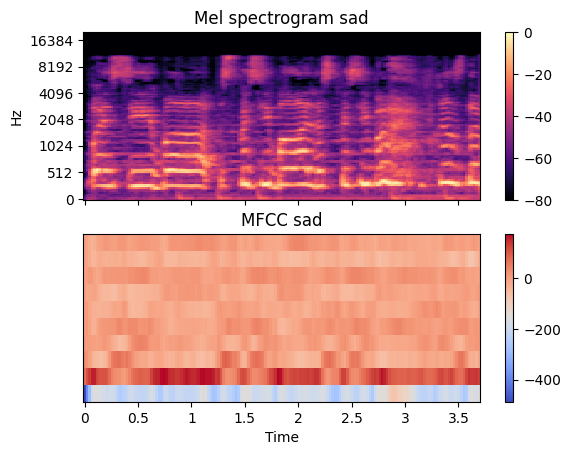

In [59]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram sad')
ax[0].label_outer()
img = librosa.display.specshow(mfccs_sad, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC sad')

In [60]:
mfccs_sad

array([[-486.4076   , -384.25482  , -294.80057  , ..., -167.96512  ,
        -178.65819  , -144.96872  ],
       [  67.78074  ,  110.32304  ,  131.53488  , ...,  132.54707  ,
         139.34464  ,  125.065186 ],
       [  28.103298 ,   16.624361 ,   -4.235086 , ...,  -24.516388 ,
         -33.79721  ,  -18.122799 ],
       ...,
       [  -5.2022734,    1.4660295,    9.776107 , ...,   -3.418936 ,
          -7.5211067,   -8.221832 ],
       [  -2.9831085,   -8.529778 ,  -21.210438 , ...,  -65.672134 ,
         -46.496025 ,  -29.960642 ],
       [  -1.8207142,   -4.8145638,  -23.679865 , ...,   10.866928 ,
           0.8314019,   -9.4995365]], dtype=float32)

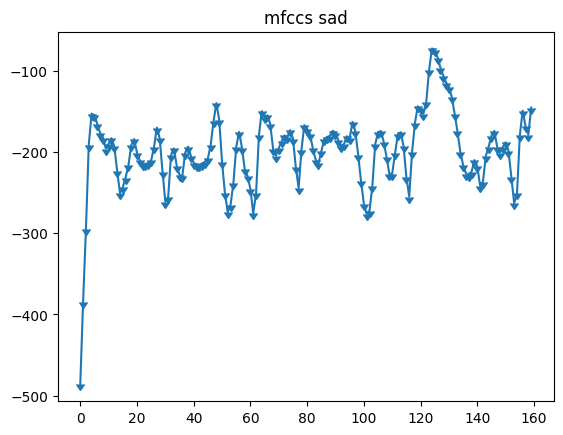

In [61]:
s = mfccs_sad[0:1,:][0,:]
t = [*range(len(s))]
plt.plot(t,  s.reshape(160,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs sad')
plt.show()


Гамматон-частотные кепстральные коэффициенты

In [6]:
import scipy
from spafe.features.gfcc import gfcc

fs, sig = scipy.io.wavfile.read('радость_10-2.wav')

gfccs_fun = gfcc(sig, fs=fs, num_ceps=13)

In [7]:
gfccs_fun

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92475210e+00, -7.73286785e-01,  2.50437660e-01, ...,
         1.01569016e-02,  2.87724490e-02, -7.48293106e-02],
       [ 6.51818120e+01, -2.12324637e+01,  1.04816666e+00, ...,
        -5.43247375e+00,  7.69067902e+00, -3.26655631e-01],
       ...,
       [ 3.65908094e+02,  8.58860438e+01, -1.52833910e+02, ...,
         4.69985966e+01,  1.54638687e+01, -1.96063410e+01],
       [ 3.92268259e+02,  1.18149403e+02, -1.50721443e+02, ...,
         3.42920406e+01, -5.34411362e+00, -1.85295013e+01],
       [ 3.50422591e+02,  1.09650122e+02, -9.48194580e+01, ...,
         2.07022604e+01,  5.49876843e+00, -5.19586932e+00]])

In [10]:
fs, sig = scipy.io.wavfile.read('грусть26-3.wav')

gfccs_sad = gfcc(sig, fs=fs, num_ceps=13)

In [11]:
gfccs_sad

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92475210e+00, -7.73286785e-01,  2.50437660e-01, ...,
         1.01569016e-02,  2.87724490e-02, -7.48293106e-02],
       [ 6.51818120e+01, -2.12324637e+01,  1.04816666e+00, ...,
        -5.43247375e+00,  7.69067902e+00, -3.26655631e-01],
       ...,
       [ 3.65908094e+02,  8.58860438e+01, -1.52833910e+02, ...,
         4.69985966e+01,  1.54638687e+01, -1.96063410e+01],
       [ 3.92268259e+02,  1.18149403e+02, -1.50721443e+02, ...,
         3.42920406e+01, -5.34411362e+00, -1.85295013e+01],
       [ 3.50422591e+02,  1.09650122e+02, -9.48194580e+01, ...,
         2.07022604e+01,  5.49876843e+00, -5.19586932e+00]])

Спектрограмма

/tmp/ipykernel_7589/2013093873.py:4: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


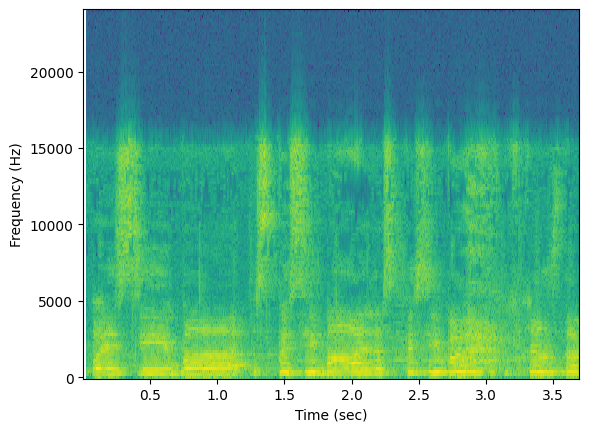

In [62]:
adata = data_fun[:, 0]
s = samplerate_fun
fr, tm, spgram = signal.spectrogram(adata, s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

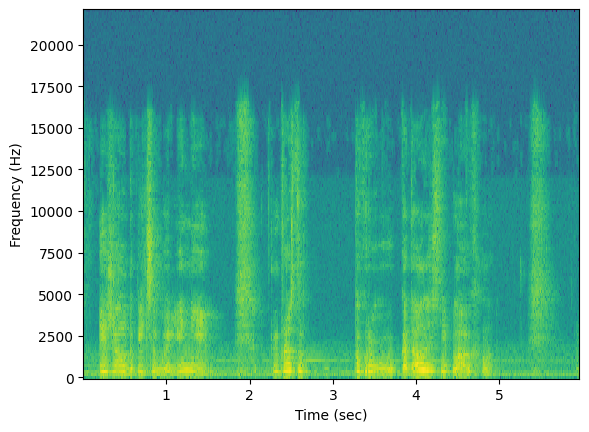

In [63]:
adata = data_sad
s = samplerate_sad
fr, tm, spgram = signal.spectrogram(adata, s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

По спектрограммам видно, что в аудио с радостью есть более высокие частоты, чем в аудио с грустью, но при этом они не сильно выражены.